# Analyze Customer Reviews with Azure OpenAI Service (AOAI)

In [19]:
# Import necessary libraries.
import pandas as pd
import openai

In [ ]:
!pip install --upgrade openai

In [14]:
# Load csv data to Pandas dataframe and display the header.
df = pd.read_csv('/Users/kaniska/Downloads/speech_sample.csv', sep='|')
df.head()

,Title,Contents,Date
0,recorded_speech_v1,"Everything’s just too much sometimes, you know...",04/01/2024


In [15]:
# Check dataframe information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1 non-null      object
 1   Contents  1 non-null      object
 2   Date      1 non-null      object
dtypes: object(3)
memory usage: 152.0+ bytes


In [23]:
from openai import OpenAI
# Configure the baseline configuration of the OpenAI library.

In [53]:
# Primary functions to interact with AOAI GPT-3 to obtain insights.
review_content_list = []

for index, headers in df.iterrows():
    print(headers["Contents"])
    review_content = str(headers["Contents"])
    print("Review Content: {}".format(review_content))
    # Use GPT-3 to classify the sentiment of the review content.
    response1 = client.chat.completions.create(
      model="gpt-4",
      messages=[
        {
            "role": "user",
            "content": "Classify the sentiment of the following review content following categories: \
      categories: [Negative, Netural, Positive]\n\nreview content : " + review_content + "\n\nClassified sentiment:",
        },
      ],
      )
    classified_sentiment = response1.choices[0].message.content.replace(" ", "")
    # print("Classified Sentiment of Review Content: {}".format(classified_sentiment))
    print("Sentiment Classified")
    
    # Use AOAI GPT-4 to find the different tones on the review content.
    response2 = client.chat.completions.create(
      model="gpt-4",
      messages=[
        {
            "role": "user",
            "content": "Based on the review content, find all the different tones with scores (out of 100). Show the scores in a json \
            which has a structure [{'tone': .., 'score': ...},{'tone': .., 'score': ...},.. ] \
            where 'tone' is the name of the key field and 'score' is the name of the value field:" \
      + review_content + "\n\nEmotional Tones:",
        },
      ],
    )
    emotional_tones = response2.choices[0].message.content.replace("\n","").replace(".","")
    print("Emotional Tones Generated")
    
    # Use GPT-4 to summarize 3 keyword based on the review content.
    response3 = client.chat.completions.create(
      model="gpt-4",
      messages=[
        {
            "role": "user",
            "content": "Based on the review content, find the key intents in maximum 5 keywords:" \
      + review_content + "\n\nIntent Keywords:",
        },
      ],
    )
    summarized_keywords = response3.choices[0].message.content.replace("\n","").replace(".","")
    
    # print("Summarize 3 Keywords from the Review Content: {}".format(summarized_keywords))
    print("Intent Keywords Generated")
    
    # Append the insights result into a list.
    review_content_list.append([review_content, classified_sentiment, emotional_tones, summarized_keywords])

# Convert the list of insights into a Pandas dataframe.
review_content_df = pd.DataFrame(review_content_list, columns=['review_content', 'classified_sentiment', 'emotional_tones','intent_keywords'])

Everything’s just too much sometimes, you know? I get so mad because the voices won’t stop yapping. It's like they’re yelling right into my ears and I can’t shut them off. Makes me so tired. I told the doctor, but I don’t think he gets it. Not really. It feels like nobody understands. And the people staring doesn’t help. They look at me funny, whispering behind my back. It just makes me angrier. I try to smile, show them I’m okay, but inside I'm screaming. Why can’t they just leave me alone? The shadows are the worst. They sneak around, almost catching me, and then they're gone when I look again. It scares me. I hold onto my usual things, my routines, because without them, I feel like I’d just float away into some dark place.
Review Content: Everything’s just too much sometimes, you know? I get so mad because the voices won’t stop yapping. It's like they’re yelling right into my ears and I can’t shut them off. Makes me so tired. I told the doctor, but I don’t think he gets it. Not real

In [54]:
# Display the result dataframe with the insights from AOAI GPT-3.
review_content_df

,review_content,classified_sentiment,emotional_tones,intent_keywords
0,"Everything’s just too much sometimes, you know...",Negative,"[{'tone': 'Anger', 'score': 82}, {'tone': 'Fea...","Frustration, Anger, Fear, Misunderstanding, Is..."


In [144]:
# Save the result dataframe into a CSV file.
review_content_df.to_csv("./data/analyzed_review_content.csv")

In [30]:
# Concatenate all the review content into a single string.
review_content_string = review_content_df['review_content'].to_string(header=False, index=False)
print(review_content_string)

Everything’s just too much sometimes, you know?...


<AxesSubplot:ylabel='review_content'>

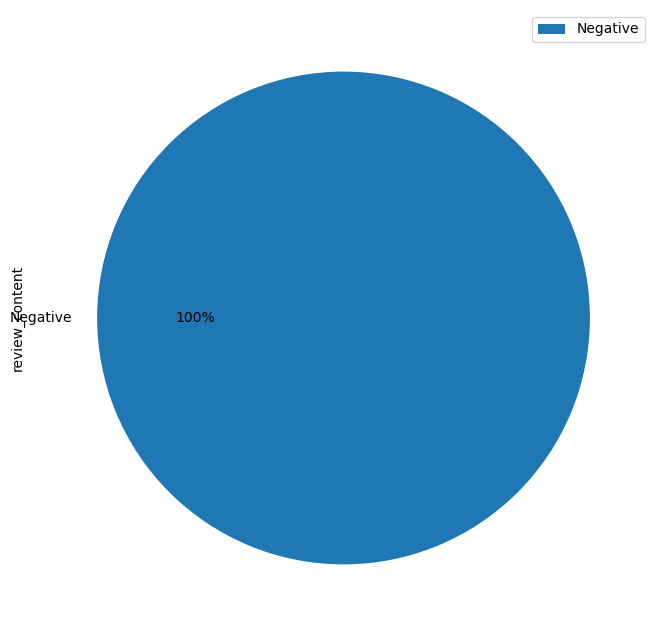

In [31]:
# Visualize the classified sentiment of the review content as a pie chart.
review_content_df.groupby(['classified_sentiment']).count().plot(kind='pie',y='review_content', autopct='%1.0f%%', \
                                                                figsize =(8,8))

In [92]:
import json
emotones_data = review_content_df["emotional_tones"]
emotones_data

0    [{'tone': 'Anger', 'score': 82}, {'tone': 'Fea...
Name: emotional_tones, dtype: object

In [106]:
from json import loads, dumps
emotones_json = emotones_data.to_json(orient='records')
emotones_json
#parsed = loads(emotones_json)
#dumps(parsed)

'["[{\'tone\': \'Anger\', \'score\': 82}, {\'tone\': \'Fear\', \'score\': 79}, {\'tone\': \'Sadness\', \'score\': 75}, {\'tone\': \'Frustration\', \'score\': 72}, {\'tone\': \'Loneliness\', \'score\': 70}]"]'

In [ ]:
#emotones_data.plot.bar(x='tone',y='score', figsize =(8,8))